<a href="https://colab.research.google.com/github/waqasali143/ImageCrop_afterDetection/blob/main/objDetec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import cv2
import pandas as pd
import os


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master


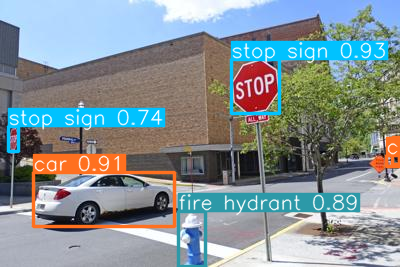

In [ ]:
  # Defines the main function that takes an image URL as an argument.

def main(imageURL):
    modalResult = loadModal(imageURL)
    modalResult.show()  # Displays the result of the YOLOv5 object detection model.
    df = modalResult.pandas().xyxy[0]

    #print(df) # you can see the detectable object description

    objectCrop(imageURL,df) # Call the Function

    # Load The Pretrained Model YOLOv5
def loadModal(imageURL):
    model = torch.hub.load('ultralytics/yolov5', 'yolov5s', _verbose=False)
    image = cv2.imread(imageURL)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return model(image)

  # This code creates a folder where the crop image is stored.

def objectCrop(imagePath, df, outputDir='crop'):
    os.makedirs(outputDir, exist_ok=True) # Creates the output directory if it does not exist.
    preCroppedImg = cv2.imread(imagePath)

    row = pd.DataFrame(df).nlargest(1, 'confidence').iloc[0]

    # print(row)  # Display the (x,y min and x,y max) confidence level, class and class name

    xmin, ymin, xmax, ymax = map(int, [row['xmin'], row['ymin'], row['xmax'], row['ymax']])
    className = row['name'] # Display the class name

    crop_Object = preCroppedImg[ymin:ymax, xmin:xmax]

    outputPath = os.path.join(outputDir, f'{className}.png')
    cv2.imwrite(outputPath, crop_Object)


if __name__ == '__main__':
    #image = 'provide the image path'
    image = '/content/media/60a.jpg'

    #  Calls the main function with the specified image path when the script is executed.
    main(image)